# Montagem de uma classificação usando Pipeline do Sklearn (KNN, Naive Bayes e Decision Tree)

https://www.kaggle.com/huhao05133/carseats

https://rdrr.io/cran/ISLR/man/Carseats.html

In [112]:
# Básicos

import numpy as np 
import pandas as pd

# Gráficos

import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn
import sklearn
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

In [2]:
df = pd.read_csv('datasets/Carseats.csv')

In [3]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
df.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [5]:
df.drop(['ShelveLoc','Urban','US'],axis=1,inplace=True)

In [6]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
0,9.50,138,73,11,276,120,42,17
1,11.22,111,48,16,260,83,65,10
2,10.06,113,35,10,269,80,59,12
3,7.40,117,100,4,466,97,55,14
4,4.15,141,64,3,340,128,38,13


In [24]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


<function matplotlib.pyplot.show(close=None, block=None)>

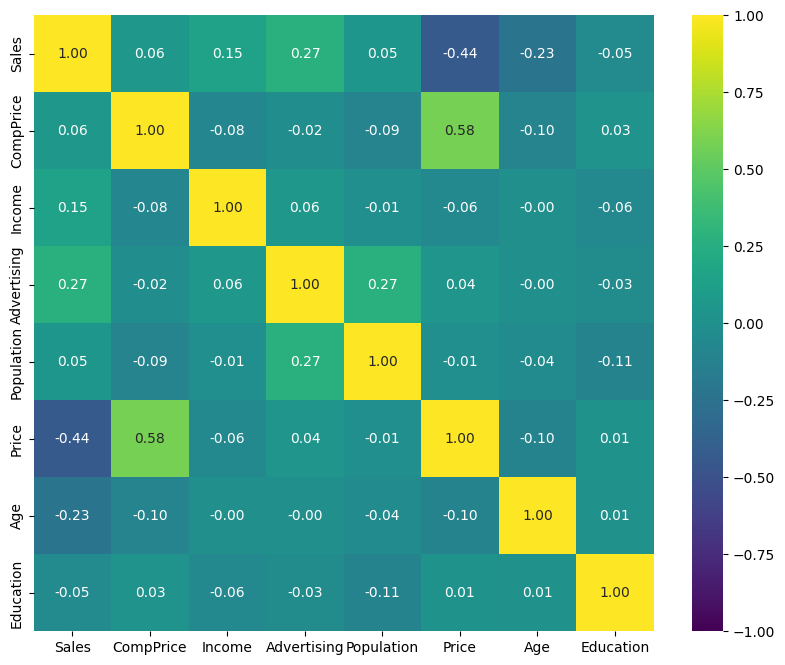

In [17]:
plt.figure(figsize=(10, 8)) 
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, fmt='.2f',cmap='viridis')
plt.show

In [93]:
model = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('imputer', SimpleImputer(strategy='mean')),
    ('knn',KNeighborsRegressor(n_neighbors=7))
])

In [94]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['Sales'],axis=1),
    df['Sales'],
    test_size=0.2,
    random_state=1
)

In [95]:
model.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('imputer', SimpleImputer()),
                ('knn', KNeighborsRegressor(n_neighbors=7))])

In [116]:
kfold = KFold(n_splits=7, shuffle=True, random_state=42)

In [119]:
results = cross_validate(model, X=df.drop(['Sales'],axis=1),y=df['Sales'],cv=kfold, scoring=["explained_variance","max_error","r2"])

In [125]:
for item in results:
    print(f"{item}: {np.round(np.average(results[item]),3)}")

fit_time: 0.004
score_time: 0.002
test_explained_variance: 0.328
test_max_error: -5.671
test_r2: 0.31


In [113]:
sklearn.metrics.get_scorer_names() 

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',